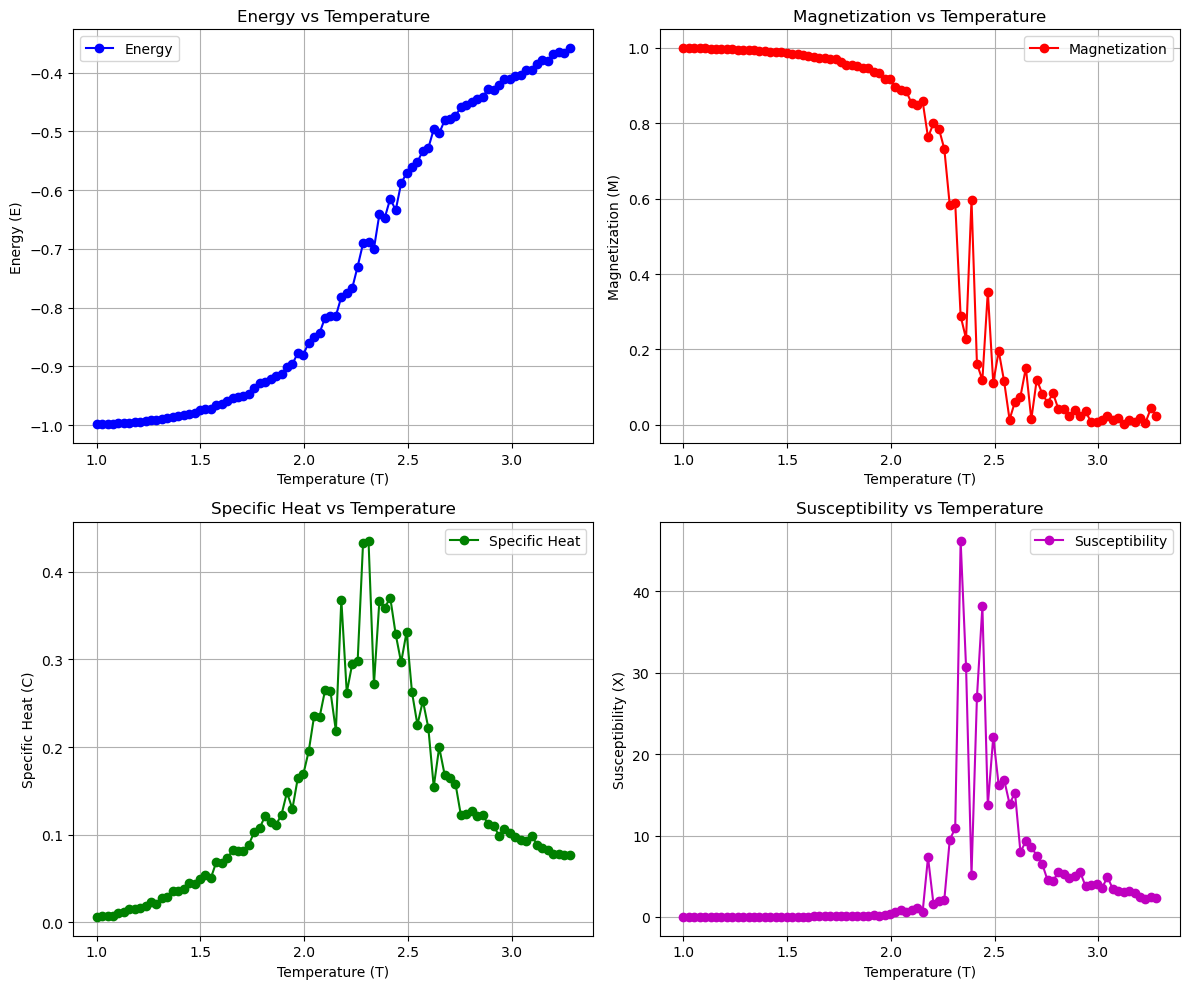

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from the text files
def load_data(filename):
    data = np.loadtxt(filename, unpack=True)
    return data

# File names
energy_file = "energy.txt"
magnetization_file = "magnetization.txt"
specific_heat_file = "specific_heat.txt"
susceptibility_file = "susceptibility.txt"

# Load the data
T, E = load_data(energy_file)
_, M = load_data(magnetization_file)
_, C = load_data(specific_heat_file)
_, X = load_data(susceptibility_file)

# Create plots
plt.figure(figsize=(12, 10))

# Plot Energy vs Temperature
plt.subplot(2, 2, 1)
plt.plot(T, E, marker='o', linestyle='-', color='b', label='Energy')
plt.xlabel('Temperature (T)')
plt.ylabel('Energy (E)')
plt.title('Energy vs Temperature')
plt.grid()
plt.legend()

# Plot Magnetization vs Temperature
plt.subplot(2, 2, 2)
plt.plot(T, M, marker='o', linestyle='-', color='r', label='Magnetization')
plt.xlabel('Temperature (T)')
plt.ylabel('Magnetization (M)')
plt.title('Magnetization vs Temperature')
plt.grid()
plt.legend()

# Plot Specific Heat vs Temperature
plt.subplot(2, 2, 3)
plt.plot(T, C, marker='o', linestyle='-', color='g', label='Specific Heat')
plt.xlabel('Temperature (T)')
plt.ylabel('Specific Heat (C)')
plt.title('Specific Heat vs Temperature')
plt.grid()
plt.legend()

# Plot Susceptibility vs Temperature
plt.subplot(2, 2, 4)
plt.plot(T, X, marker='o', linestyle='-', color='m', label='Susceptibility')
plt.xlabel('Temperature (T)')
plt.ylabel('Susceptibility (X)')
plt.title('Susceptibility vs Temperature')
plt.grid()
plt.legend()

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


In [123]:
def calculate_average_energy_single_histogram(file_path, beta_target, n_bins=10):
    # Load the energy data from the file for the reference temperature (T = 2.5)
    data_reference = np.loadtxt(file_path)
    energy_values_reference = data_reference[:, 1]  # Assuming the second column contains energy values

    # Create a histogram of energy for the reference temperature
    hist_ref, bin_edges_ref = np.histogram(energy_values_reference, bins=n_bins, density=True)
    bin_centers_ref = 0.5 * (bin_edges_ref[:-1] + bin_edges_ref[1:])
    
    beta=1/2.5
    # Calculate Z(β) for the reference temperature
    Z_ref = np.sum(hist_ref * np.exp((beta-beta_target) * (bin_centers_ref)))
    
    
    
    
    # Calculate P(E_j | β) for the target temperature
    P_E_given_beta_target = (hist_ref * np.exp((beta-beta_target) * bin_centers_ref)) / Z_ref

    # Calculate U(β) for the target temperature
    U_beta_target = np.sum(bin_centers_ref * P_E_given_beta_target)/np.sum(hist_ref*np.exp((beta-beta_target)*bin_centers_ref ))

    return U_beta_target/256

# Example usage for T = 3
beta_target = 1.0 / 3.0  # Specify the target beta for T = 3
average_energy_T3 = calculate_average_energy_single_histogram("rew_T2.6_N16.txt", beta_target)
print(f"Estimated Average Energy U(β) at T = 3: {average_energy_T3:.4f}")


Estimated Average Energy U(β) at T = 3: -202914.8435


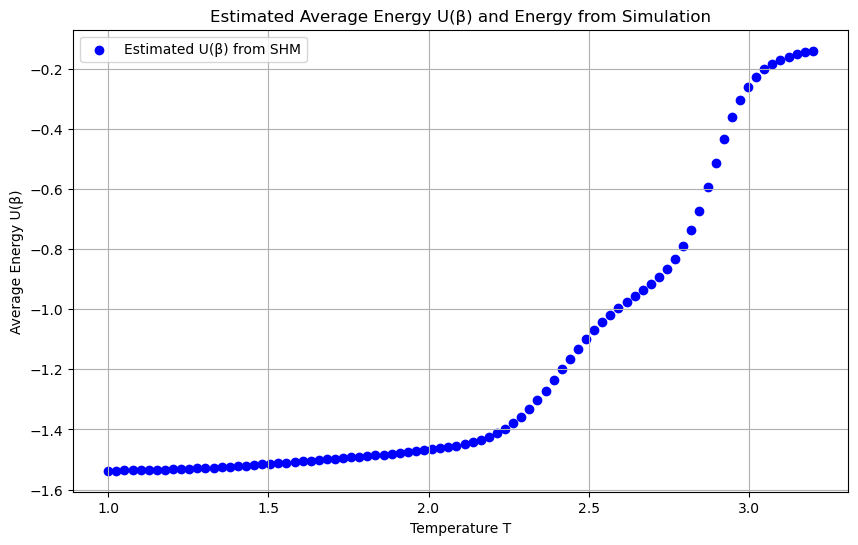

In [124]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_average_energy_single_histogram(file_path, beta_values, n_bins=150):
    # Load the energy data from the file for the reference temperature (T = 2.5)
    data_reference = np.loadtxt(file_path)
    en = data_reference[:, 1]  # Assuming the second column contains energy values
    
    beta=1/2.6
    # Create a histogram of energy for the reference temperature
    hist_ref, bin_edges_ref = np.histogram(en, bins=n_bins, density=True)
    bin_centers_ref = 0.5 * (bin_edges_ref[:-1] + bin_edges_ref[1:])

    U_beta = []
    
    # Loop over the beta values and calculate U(β)
    for beta_target in beta_values:
        # Calculate Z(β) for the reference temperature
        Z_ref = np.sum(hist_ref * np.exp((beta-beta_target) * bin_centers_ref))

        # Calculate P(E_j | β) for the target temperature
        P_E_given_beta_target = (hist_ref * np.exp((beta-beta_target) * bin_centers_ref)) 

        # Calculate U(β) for the target temperature
        U_beta_target = np.sum(bin_centers_ref * P_E_given_beta_target )/np.sum(hist_ref*np.exp((beta-beta_target)*bin_centers_ref ))

        U_beta.append(U_beta_target/256)

    return U_beta

# Generate beta values for temperatures from 1 to 3
T_values = np.linspace(1, 3.2, 88)
beta_values = 1.0 / T_values  # Inverse temperature

# Calculate average energies for each beta
average_energies = calculate_average_energy_single_histogram("rew_T2.6_N16.txt", beta_values)

# Load energy data from energy.txt for overlay
energy_data = np.loadtxt("energy.txt")
T_energy = energy_data[:, 0]  # Assuming first column is temperature
U_energy = energy_data[:, 1]  # Assuming second column is average energy

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(T_values, average_energies, label='Estimated U(β) from SHM', color='blue')
#plt.scatter(T_energy, U_energy, label='U(β) from energy.txt', color='red', marker='x')
plt.title('Estimated Average Energy U(β) and Energy from Simulation')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')

plt.legend()
plt.grid()
plt.show()


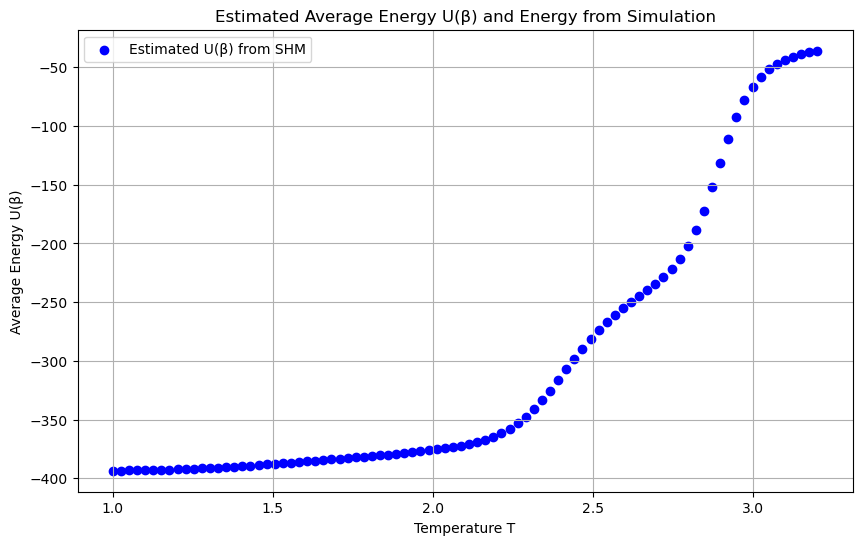

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_average_energy_single_histogram(file_path, beta_values, n_bins=150):
    # Load the energy data from the file for the reference temperature (T = 2.5)
    data_reference = np.loadtxt(file_path)
    en = data_reference[:, 1]  # Assuming the second column contains energy values
    
    beta=1/2.6
    # Create a histogram of energy for the reference temperature
    hist_ref, bin_edges_ref = np.histogram(en, bins=n_bins, density=True)
    bin_centers_ref = 0.5 * (bin_edges_ref[:-1] + bin_edges_ref[1:])

    U_beta = []
    
    # Loop over the beta values and calculate U(β)
    for beta_target in beta_values:
        # Calculate Z(β) for the reference temperature
        exp_term = np.exp((beta - beta_target) * bin_centers_ref)
        
        # Normalize to avoid overflow/underflow
        exp_term /= np.max(exp_term)

        Z_ref = np.sum(hist_ref * exp_term)

        # Calculate P(E_j | β) for the target temperature
        P_E_given_beta_target = hist_ref * exp_term

        # Calculate U(β) for the target temperature
        U_beta_target = np.sum(bin_centers_ref * P_E_given_beta_target) / Z_ref

        U_beta.append(U_beta_target)

    return U_beta

# Generate beta values for temperatures from 1 to 3.2
T_values = np.linspace(1, 3.2, 88)
beta_values = 1.0 / T_values  # Inverse temperature

# Calculate average energies for each beta
average_energies = calculate_average_energy_single_histogram("rew_T2.6_N16.txt", beta_values)

# Load energy data from energy.txt for overlay
energy_data = np.loadtxt("energy.txt")
T_energy = energy_data[:, 0]  # Assuming first column is temperature
U_energy = energy_data[:, 1]  # Assuming second column is average energy

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(T_values, average_energies, label='Estimated U(β) from SHM', color='blue')
#plt.scatter(T_energy, U_energy, label='U(β) from energy.txt', color='red', marker='x')
plt.title('Estimated Average Energy U(β) and Energy from Simulation')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')
plt.legend()
plt.grid()
plt.show()


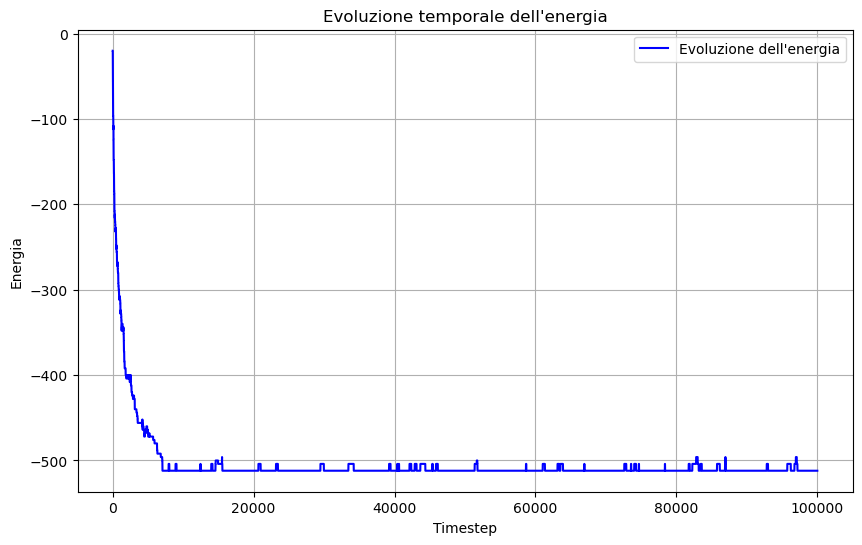

In [126]:
import numpy as np
import matplotlib.pyplot as plt

def plot_energy_time_evolution(file_path):
    # Carica i dati dal file (timestep nella prima colonna e energia nella seconda colonna)
    data = np.loadtxt(file_path)
    timesteps = data[:, 0]  # Prima colonna: timestep
    energies = data[:, 1]    # Seconda colonna: energia

    # Crea il grafico
    plt.figure(figsize=(10, 6))
    plt.plot(timesteps, energies, color='blue', label='Evoluzione dell\'energia')
    
    # Titoli e etichette
    plt.title('Evoluzione temporale dell\'energia')
    plt.xlabel('Timestep')
    plt.ylabel('Energia')
    plt.grid(True)
    plt.legend()
    
    # Mostra il grafico
    plt.show()

# Esegui la funzione per visualizzare l'evoluzione temporale
plot_energy_time_evolution("rew_T1.0_N16.txt")


In [127]:
import numpy as np
import pandas as pd

def calculate_average_energy_after_steps(file_path, step_threshold=20000):
    # Carica i dati dal file (assumendo che la prima colonna sia il timestep e la seconda l'energia)
    data = np.loadtxt(file_path)
    timesteps = data[:, 0]  # Prima colonna: timestep
    energies = data[:, 1]    # Seconda colonna: energia

    # Filtra i dati per includere solo quelli dopo il passo specificato (step_threshold)
    mask = timesteps >= step_threshold
    energies_after_threshold = energies[mask]

    # Calcola l'energia media dopo il passo specificato
    average_energy = np.mean(energies_after_threshold)
    
    return average_energy

def process_files(file_paths, step_threshold=20000):
    # Lista per memorizzare i risultati
    results = []

    # Itera su ciascun file
    for file_path in file_paths:
        # Calcola l'energia media dopo il passo specificato
        average_energy = calculate_average_energy_after_steps(file_path, step_threshold)/256

        # Estrai la temperatura dal nome del file (assumiamo che sia scritta nel formato 'rew_T1.0_N16.txt')
        temperature = float(file_path.split('_')[1][1:])  # Estrai la parte che rappresenta la temperatura

        # Aggiungi i risultati alla lista
        results.append({'File': file_path, 'Temperatura': temperature, 'Energia Media': average_energy})

    # Converti i risultati in un DataFrame pandas
    df_results = pd.DataFrame(results)
    
    return df_results

# Elenco dei file (puoi aggiungere i tuoi file qui)
file_paths = ["rew_T1.0_N16.txt", 
              "rew_T1.4_N16.txt", 
              "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt",
             "rew_T1.9_N16.txt",
             "rew_T2.1_N16.txt",
             "rew_T2.4_N16.txt",
             "rew_T2.6_N16.txt",
             "rew_T2.7_N16.txt",
             "rew_T2.9_N16.txt",
             "rew_T3.1_N16.txt",
             "rew_T3.3_N16.txt",
             "rew_T3.5_N16.txt",
             "rew_T3.7_N16.txt",
             "rew_T3.9_N16.txt",]

# Esegui la funzione per calcolare l'energia media per ciascun file
df_results = process_files(file_paths, step_threshold=20000)

# Mostra i risultati
df_results

# Opzionalmente, puoi salvare i risultati in un file CSV
df_results.to_csv("energy_averages.csv", index=False)


In [128]:
df_results

,File,Temperatura,Energia Media
0,rew_T1.0_N16.txt,1.0,-1.996473
1,rew_T1.4_N16.txt,1.4,-1.970826
2,rew_T1.5_N16.txt,1.5,-1.940585
3,rew_T1.7_N16.txt,1.7,-1.887241
4,rew_T1.9_N16.txt,1.9,-1.819384
5,rew_T2.1_N16.txt,2.1,-1.654241
6,rew_T2.4_N16.txt,2.4,-1.200117
7,rew_T2.6_N16.txt,2.6,-0.995154
8,rew_T2.7_N16.txt,2.7,-0.968029
9,rew_T2.9_N16.txt,2.9,-0.856525


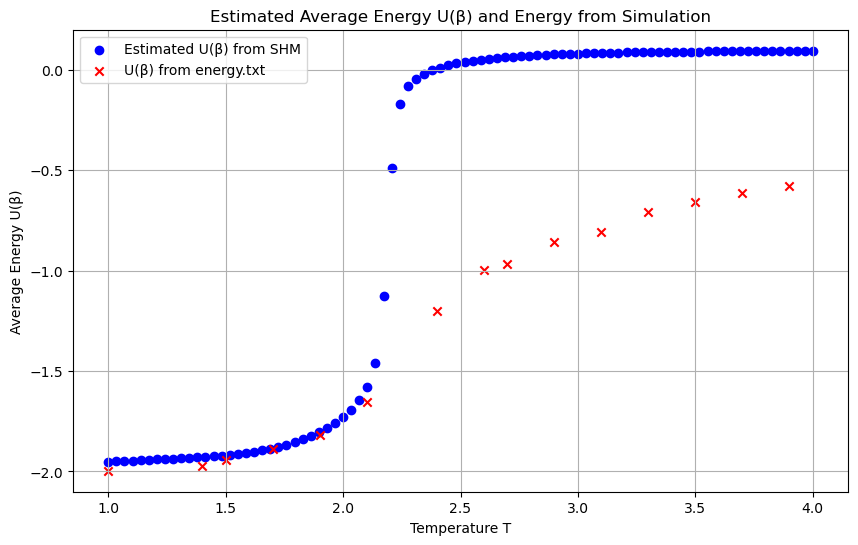

In [129]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_average_energy_single_histogram(file_path, beta_values, n_bins=250):
    # Load the energy data from the file for the reference temperature (T = 2.5)
    data_reference = np.loadtxt(file_path)
    en = data_reference[:, 1]  # Assuming the second column contains energy values
    
    beta=1/2.1
    # Create a histogram of energy for the reference temperature
    hist_ref, bin_edges_ref = np.histogram(en, bins=n_bins, density=True)
    bin_centers_ref = 0.5 * (bin_edges_ref[:-1] + bin_edges_ref[1:])

    U_beta = []
    
    # Loop over the beta values and calculate U(β)
    for beta_target in beta_values:
        # Calculate Z(β) for the reference temperature
        Z_ref = np.sum(hist_ref * np.exp((beta-beta_target) * bin_centers_ref))

        # Calculate P(E_j | β) for the target temperature
        P_E_given_beta_target = (hist_ref * np.exp((beta-beta_target) * bin_centers_ref)) 

        # Calculate U(β) for the target temperature
        U_beta_target = np.sum(bin_centers_ref * P_E_given_beta_target )/np.sum(hist_ref*np.exp((beta-beta_target)*bin_centers_ref ))

        U_beta.append(U_beta_target/256)

    return U_beta

# Generate beta values for temperatures from 1 to 3.2
T_values = np.linspace(1, 4, 88)
beta_values = 1.0 / T_values  # Inverse temperature

# Calculate average energies for each beta
average_energies = calculate_average_energy_single_histogram("rew_T2.1_N16.txt", beta_values)

# Load energy data from energy.txt for overlay

T_energy = df_results['Temperatura']  # Assuming first column is temperature
U_energy = df_results['Energia Media'] # Assuming second column is average energy




# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(T_values, average_energies, label='Estimated U(β) from SHM', color='blue')
plt.scatter(T_energy, U_energy, label='U(β) from energy.txt', color='red', marker='x')
#plt.scatter(T_energy_1, U_energy_1, label='U(β) from energy.txt', color='k', marker='x')
plt.title('Estimated Average Energy U(β) and Energy from Simulation')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')
plt.legend()
plt.grid()
plt.show()



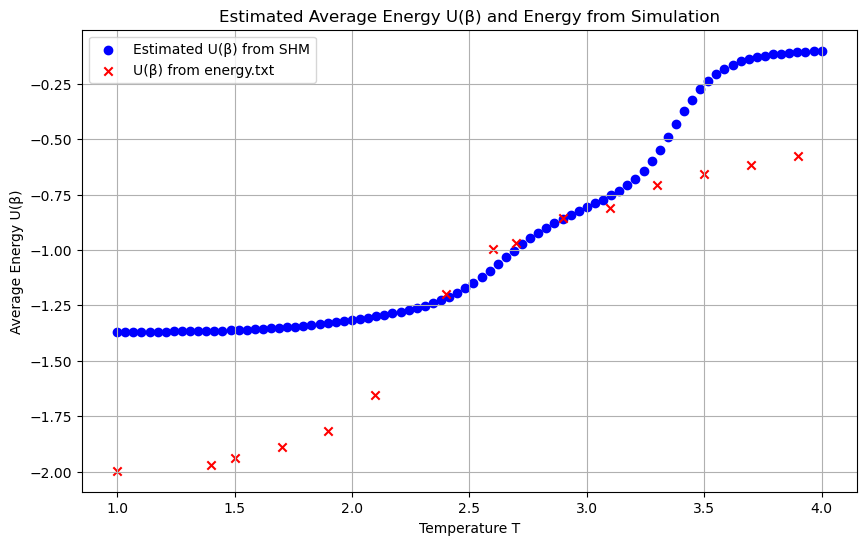

In [130]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_average_energy_single_histogram(file_path, beta_values, n_bins=250):
    # Load the energy data from the file for the reference temperature (T = 2.5)
    data_reference = np.loadtxt(file_path)
    en = data_reference[:, 1]  # Assuming the second column contains energy values
    
    beta=1/2.9
    # Create a histogram of energy for the reference temperature
    hist_ref, bin_edges_ref = np.histogram(en, bins=n_bins, density=True)
    bin_centers_ref = 0.5 * (bin_edges_ref[:-1] + bin_edges_ref[1:])

    U_beta = []
    
    # Loop over the beta values and calculate U(β)
    for beta_target in beta_values:
        # Calculate Z(β) for the reference temperature
        Z_ref = np.sum(hist_ref * np.exp((beta-beta_target) * bin_centers_ref))

        # Calculate P(E_j | β) for the target temperature
        P_E_given_beta_target = (hist_ref * np.exp((beta-beta_target) * bin_centers_ref)) 

        # Calculate U(β) for the target temperature
        U_beta_target = np.sum(bin_centers_ref * P_E_given_beta_target )/np.sum(hist_ref*np.exp((beta-beta_target)*bin_centers_ref ))

        U_beta.append(U_beta_target/256)

    return U_beta

# Generate beta values for temperatures from 1 to 3.2
T_values = np.linspace(1, 4, 88)
beta_values = 1.0 / T_values  # Inverse temperature

# Calculate average energies for each beta
average_energies = calculate_average_energy_single_histogram("rew_T2.9_N16.txt", beta_values)

# Load energy data from energy.txt for overlay

T_energy = df_results['Temperatura']  # Assuming first column is temperature
U_energy = df_results['Energia Media'] # Assuming second column is average energy

# Load energy data from energy.txt for overlay
energy_data = np.loadtxt("energy.txt")
T_energy_1 = energy_data[:, 0]  # Assuming first column is temperature
U_energy_1 = energy_data[:, 1]  # Assuming second column is average energy


# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(T_values, average_energies, label='Estimated U(β) from SHM', color='blue')
plt.scatter(T_energy, U_energy, label='U(β) from energy.txt', color='red', marker='x')
#plt.scatter(T_energy_1, U_energy_1, label='U(β) from energy.txt', color='k', marker='x')
plt.title('Estimated Average Energy U(β) and Energy from Simulation')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')
plt.legend()
plt.grid()
plt.show()




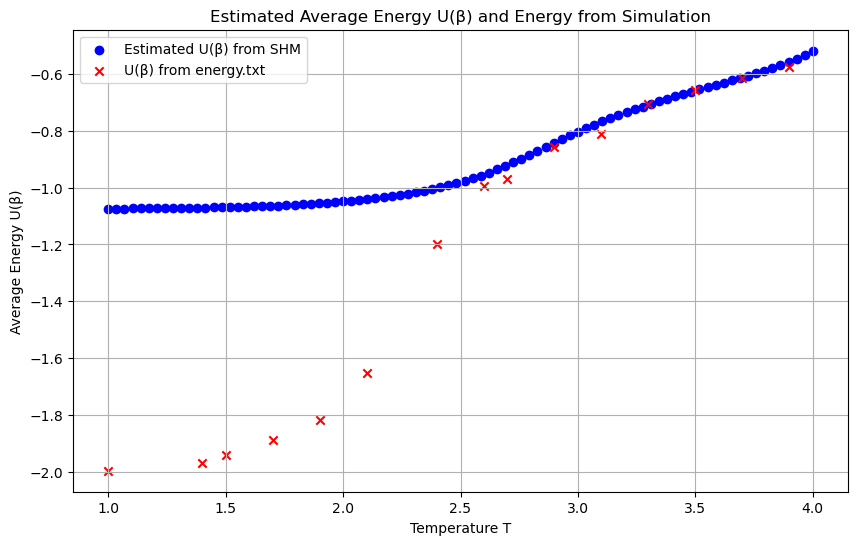

In [131]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_average_energy_single_histogram(file_path, beta_values, n_bins=250):
    # Load the energy data from the file for the reference temperature (T = 2.5)
    data_reference = np.loadtxt(file_path)
    en = data_reference[:, 1]  # Assuming the second column contains energy values
    
    beta=1/3.5
    # Create a histogram of energy for the reference temperature
    hist_ref, bin_edges_ref = np.histogram(en, bins=n_bins, density=True)
    bin_centers_ref = 0.5 * (bin_edges_ref[:-1] + bin_edges_ref[1:])

    U_beta = []
    
    # Loop over the beta values and calculate U(β)
    for beta_target in beta_values:
        # Calculate Z(β) for the reference temperature
        Z_ref = np.sum(hist_ref * np.exp((beta-beta_target) * bin_centers_ref))

        # Calculate P(E_j | β) for the target temperature
        P_E_given_beta_target = (hist_ref * np.exp((beta-beta_target) * bin_centers_ref)) 

        # Calculate U(β) for the target temperature
        U_beta_target = np.sum(bin_centers_ref * P_E_given_beta_target )/np.sum(hist_ref*np.exp((beta-beta_target)*bin_centers_ref ))

        U_beta.append(U_beta_target/256)

    return U_beta

# Generate beta values for temperatures from 1 to 3.2
T_values = np.linspace(1, 4, 88)
beta_values = 1.0 / T_values  # Inverse temperature

# Calculate average energies for each beta
average_energies = calculate_average_energy_single_histogram("rew_T3.5_N16.txt", beta_values)

# Load energy data from energy.txt for overlay

T_energy = df_results['Temperatura']  # Assuming first column is temperature
U_energy = df_results['Energia Media'] # Assuming second column is average energy



# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(T_values, average_energies, label='Estimated U(β) from SHM', color='blue')
plt.scatter(T_energy, U_energy, label='U(β) from energy.txt', color='red', marker='x')

plt.title('Estimated Average Energy U(β) and Energy from Simulation')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')
plt.legend()
plt.grid()
plt.show()





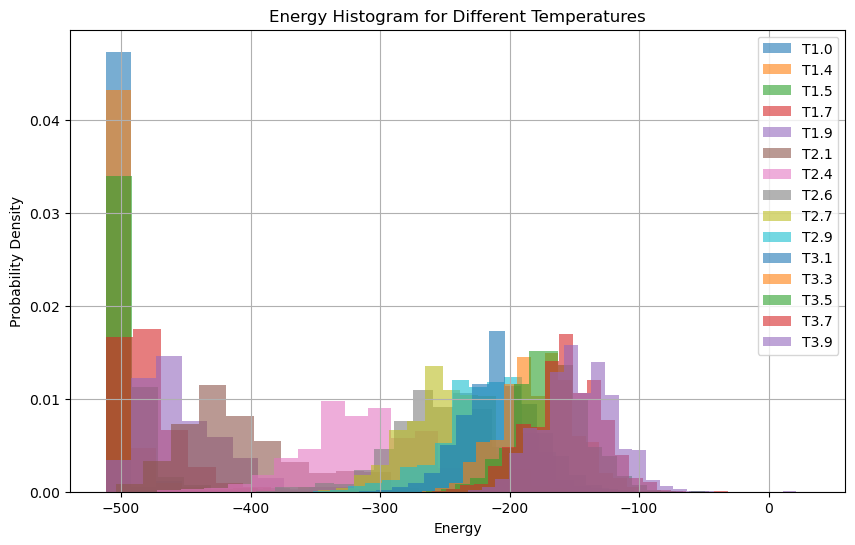

In [132]:
import numpy as np
import matplotlib.pyplot as plt

def plot_energy_histogram(file_paths, n_bins=2):
    plt.figure(figsize=(10, 6))  # Set the figure size

    # Loop through each file to calculate the energy histogram
    for file_path in file_paths:
        # Load the data from the file (assuming first column is timestep and second is energy)
        data = np.loadtxt(file_path)
        energies = data[:, 1]    # Second column: energy

        # Create the histogram for energies
        plt.hist(energies, bins=25, density=True, alpha=0.6, label=f'{file_path.split("_")[1]}')

    # Set the title and labels for the plot
    plt.title('Energy Histogram for Different Temperatures')
    plt.xlabel('Energy')
    plt.ylabel('Probability Density')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# List of files (you can add your files here)
file_paths = ["rew_T1.0_N16.txt", 
              "rew_T1.4_N16.txt", 
              "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt",
              "rew_T1.9_N16.txt",
              "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt",
              "rew_T2.6_N16.txt",
              "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt",
              "rew_T3.1_N16.txt",
              "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt",
              "rew_T3.7_N16.txt",
              "rew_T3.9_N16.txt"]

# Run the function to plot the energy histograms for all files
plot_energy_histogram(file_paths, n_bins=50)


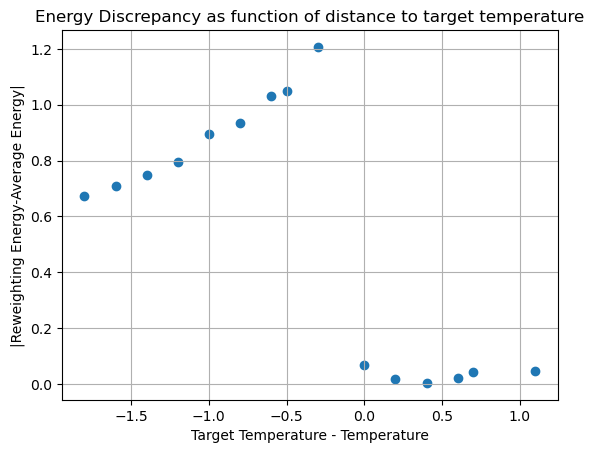

In [133]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_average_energy_single_histogram(file_path, beta_values, n_bins=250):
    # Load the energy data from the file for the reference temperature (T = 2.5)
    data_reference = np.loadtxt(file_path)
    en = data_reference[:, 1]  # Assuming the second column contains energy values
    
    beta=1/2.1
    # Create a histogram of energy for the reference temperature
    hist_ref, bin_edges_ref = np.histogram(en, bins=n_bins, density=True)
    bin_centers_ref = 0.5 * (bin_edges_ref[:-1] + bin_edges_ref[1:])

    U_beta = []
    
    # Loop over the beta values and calculate U(β)
    for beta_target in beta_values:
        # Calculate Z(β) for the reference temperature
        Z_ref = np.sum(hist_ref * np.exp((beta-beta_target) * bin_centers_ref))

        # Calculate P(E_j | β) for the target temperature
        P_E_given_beta_target = (hist_ref * np.exp((beta-beta_target) * bin_centers_ref)) 

        # Calculate U(β) for the target temperature
        U_beta_target = np.sum(bin_centers_ref * P_E_given_beta_target )/np.sum(hist_ref*np.exp((beta-beta_target)*bin_centers_ref ))

        U_beta.append(U_beta_target/256)

    return U_beta

# Generate beta values for temperatures from 1 to 3.2
T_values = np.array([1.0,1.4,1.5,1.7,1.9,2.1,2.4, 2.6,2.7,2.9,3.1,3.3, 3.5,3.7,3.9])
beta_values = 1.0 / T_values  # Inverse temperature

# Calculate average energies for each beta
average_energies_discr = calculate_average_energy_single_histogram("rew_T2.1_N16.txt", beta_values)

# Load energy data from energy.txt for overlay

T_energy = df_results['Temperatura']  # Assuming first column is temperature
U_energy = df_results['Energia Media'] # Assuming second column is average energy

temp_discr=(2.1-T_values)
U_discr=np.abs(average_energies_discr -U_energy)


plt.scatter(temp_discr,U_discr)
plt.xlabel('Target Temperature - Temperature')
plt.ylabel('|Reweighting Energy-Average Energy|')
plt.grid(True)
plt.title('Energy Discrepancy as function of distance to target temperature')

plt.show()

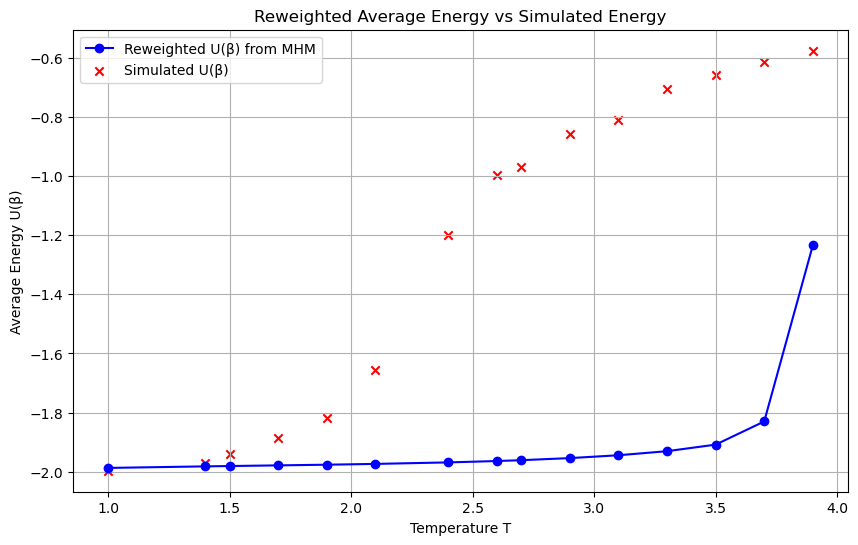

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_histogram_after_steps(file_path, step_threshold=30000, n_bins=150):
    # Load the data (assuming first column is timestep and second column is energy)
    data = np.loadtxt(file_path)
    timesteps = data[:, 0]  # First column: timestep
    energies = data[:, 1]   # Second column: energy

    # Filter the data after the step threshold
    mask = timesteps >= step_threshold
    energies_after_threshold = energies[mask]

    # Create a histogram of the energy
    hist, bin_edges = np.histogram(energies_after_threshold, bins=n_bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    return bin_centers, hist

def multiple_histogram_method(file_paths, step_threshold=20000, n_bins=150):
    # Variables to store histograms and beta values
    histograms = []
    bin_centers_all = []
    betas = []
    Ns = []

    # Loop through the files and process each one
    for file_path in file_paths:
        # Calculate the histogram for each file
        bin_centers, hist = calculate_histogram_after_steps(file_path, step_threshold, n_bins)
        histograms.append(hist)
        bin_centers_all.append(bin_centers)

        # Extract the temperature from the file name (assuming it's in the format 'rew_T1.0_N16.txt')
        temperature = float(file_path.split('_')[1][1:])  # Extract the temperature value
        beta = 1.0 / temperature  # Calculate beta from temperature
        betas.append(beta)

        # Add the total number of samples for normalization
        Ns.append(np.sum(hist))

    # Now we perform the multiple histogram method (MHM)
    bin_centers_all = np.array(bin_centers_all)
    
    betas = np.array(betas)
    Ns = np.array(Ns)

    # Initialize reweighted averages
    reweighted_avg_energies = []

    # Loop over beta values to perform reweighting
    for beta_target in betas:
        numerator = np.zeros_like(bin_centers_all)
        denominator = 0

        # Sum over all histograms to calculate the numerator and denominator
        for i, (hist, beta_i, N_i) in enumerate(zip(histograms, betas, Ns)):
            weight_factor = np.exp((beta_i - beta_target) * bin_centers_all)
            numerator += hist * weight_factor/80000 
            denominator += hist * weight_factor/80000

        # Calculate reweighted average energy for the target beta
        avg_energy_target = np.sum(numerator*bin_centers_all) / (np.sum(denominator)*256)
        reweighted_avg_energies.append(avg_energy_target)

    return betas, reweighted_avg_energies

# List of files
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Execute the multiple histogram method
betas, reweighted_avg_energies = multiple_histogram_method(file_paths, step_threshold=20000, n_bins=150)

# Convert beta values to temperature for plotting
T_values = 1.0 / betas

# Load the energy data from df_results for simulated average energies
# Assuming df_results has columns 'Temperatura' and 'Energia Media'
T_energy = df_results['Temperatura']
U_energy = df_results['Energia Media']

# Plotting the results for comparison
plt.figure(figsize=(10, 6))
plt.plot(T_values, reweighted_avg_energies, label='Reweighted U(β) from MHM', color='blue', marker='o')
plt.scatter(T_energy, U_energy, label='Simulated U(β)', color='red', marker='x')

plt.title('Reweighted Average Energy vs Simulated Energy')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')
plt.legend(loc='best')
plt.grid(True)
plt.show()



/var/folders/_b/dwnrhdgd0y7_7nj2zgdrqt6m0000gq/T/ipykernel_92182/703142053.py:68: RuntimeWarning: overflow encountered in double_scalars
  O_numerator[i] += (hist[i] / (N_j * weight_factor)) / Z_target  # Accumulate for O(β)


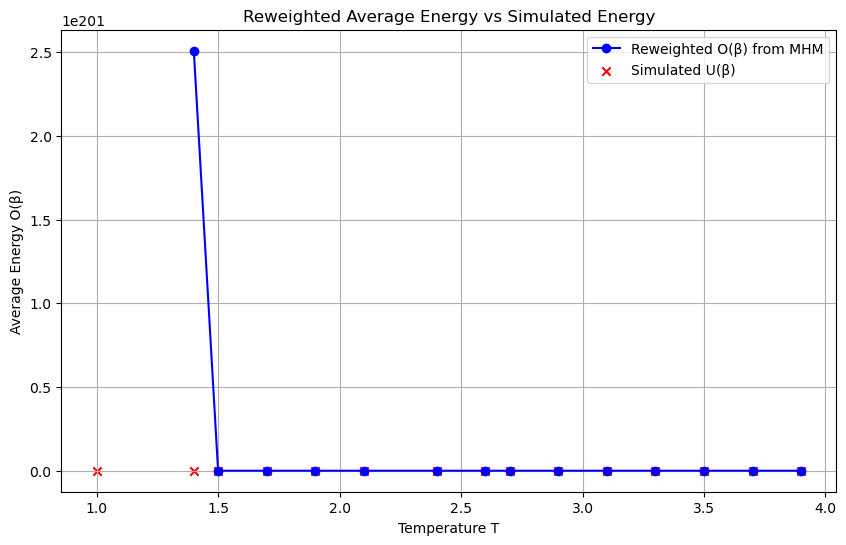

In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_histogram_after_steps(file_path, step_threshold=20000, n_bins=150):
    # Load the data (assuming first column is timestep and second column is energy)
    data = np.loadtxt(file_path)
    timesteps = data[:, 0]  # First column: timestep
    energies = data[:, 1]   # Second column: energy

    # Filter the data after the step threshold
    mask = timesteps >= step_threshold
    energies_after_threshold = energies[mask]

    # Create a histogram of the energy
    hist, bin_edges = np.histogram(energies_after_threshold, bins=n_bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    return bin_centers, hist

def multiple_histogram_method(file_paths, step_threshold=20000, n_bins=150):
    # Variables to store histograms and beta values
    histograms = []
    bin_centers_all = []
    betas = []
    Ns = []

    # Loop through the files and process each one
    for file_path in file_paths:
        # Calculate the histogram for each file
        bin_centers, hist = calculate_histogram_after_steps(file_path, step_threshold, n_bins)
        histograms.append(hist)
        bin_centers_all.append(bin_centers)

        # Extract the temperature from the file name
        temperature = float(file_path.split('_')[1][1:])  # Extract the temperature value
        beta = 1.0 / temperature  # Calculate beta from temperature
        betas.append(beta)

        # Add the total number of samples for normalization
        Ns.append(np.sum(hist))

    # Convert to arrays
    bin_centers_all = np.array(bin_centers_all)
    betas = np.array(betas)
    Ns = np.array(Ns)

    # Initialize Z(β) and O(β)
    Z_values = []
    O_values = []

    # Calculate Z(β) and O(β)
    for target_beta in betas:
        # Calculate Z(β)
        Z_numerator = np.zeros_like(bin_centers_all)

        for j, (hist, beta_j, N_j) in enumerate(zip(histograms, betas, Ns)):
            weight_factor = np.exp((target_beta - beta_j) * bin_centers_all)  # Using the first bin centers
            Z_numerator += hist / (N_j * weight_factor)  # Normalization by the weight factor
            
        Z_target = 1/np.sum( Z_numerator)  # Calculate Z(β)

        # Calculate O(β)
        O_numerator = np.zeros_like(bin_centers_all[0])
        for j, (hist, beta_j, N_j) in enumerate(zip(histograms, betas, Ns)):
            for i in range(len(bin_centers_all[0])):
                weight_factor = np.exp((target_beta - beta_j) * bin_centers_all[0][i])  # Calculate weight for each bin
                O_numerator[i] += (hist[i] / (N_j * weight_factor)) / Z_target  # Accumulate for O(β)

        O_values.append(np.sum(O_numerator))  # Store O(β)
        Z_values.append(Z_target)  # Store Z(β)

    return betas, Z_values, O_values

# List of files
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Execute the multiple histogram method
betas, Z_values, O_values = multiple_histogram_method(file_paths, step_threshold=20000, n_bins=150)

# Convert beta values to temperature for plotting
T_values = 1.0 / betas

# Load the energy data from df_results for simulated average energies
# Assuming df_results has columns 'Temperatura' and 'Energia Media'
T_energy = df_results['Temperatura']
U_energy = df_results['Energia Media']

# Plotting the results for comparison
plt.figure(figsize=(10, 6))
plt.plot(T_values, O_values, label='Reweighted O(β) from MHM', color='blue', marker='o')
plt.scatter(T_energy, U_energy, label='Simulated U(β)', color='red', marker='x')

plt.title('Reweighted Average Energy vs Simulated Energy')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy O(β)')
plt.legend(loc='best')
plt.grid(True)
plt.show()


---
seconda parte
## multple histogra method

In [136]:
import numpy as np

# Funzione per leggere le energie da un file
def read_energies(file_path):
    # Supponiamo che il file contenga una sola colonna con le energie
    energies = np.loadtxt(file_path)
    return energies

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Dizionario per salvare le energie lette da ciascun file
energy_data = {}

# Leggiamo le energie da ciascun file
for file in file_paths:
    energies = read_energies(file)
    energy_data[file] = energies

# Controlliamo che le energie siano state caricate correttamente
for file, energies in energy_data.items():
    print(f"File: {file}, Number of samples: {len(energies)}")


File: rew_T1.0_N16.txt, Number of samples: 100000
File: rew_T1.4_N16.txt, Number of samples: 100000
File: rew_T1.5_N16.txt, Number of samples: 100000
File: rew_T1.7_N16.txt, Number of samples: 100000
File: rew_T1.9_N16.txt, Number of samples: 100000
File: rew_T2.1_N16.txt, Number of samples: 100000
File: rew_T2.4_N16.txt, Number of samples: 100000
File: rew_T2.6_N16.txt, Number of samples: 100000
File: rew_T2.7_N16.txt, Number of samples: 100000
File: rew_T2.9_N16.txt, Number of samples: 100000
File: rew_T3.1_N16.txt, Number of samples: 100000
File: rew_T3.3_N16.txt, Number of samples: 100000
File: rew_T3.5_N16.txt, Number of samples: 100000
File: rew_T3.7_N16.txt, Number of samples: 100000
File: rew_T3.9_N16.txt, Number of samples: 100000


In [137]:
import numpy as np

# Funzione per leggere le energie a partire dal passo 20.001
def read_energies_after_20k_steps(file_path):
    # Salta i primi 20k passi e leggi il resto delle energie
    energies = np.loadtxt(file_path, skiprows=20000)
    return energies

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Dizionario per salvare le energie lette da ciascun file
energy_data = {}

# Leggiamo le energie dopo i primi 20k passi da ciascun file
for file in file_paths:
    energies = read_energies_after_20k_steps(file)
    energy_data[file] = energies

# Controlliamo che le energie siano state caricate correttamente
for file, energies in energy_data.items():
    print(f"File: {file}, Number of samples after 20k steps: {len(energies)}")


File: rew_T1.0_N16.txt, Number of samples after 20k steps: 80000
File: rew_T1.4_N16.txt, Number of samples after 20k steps: 80000
File: rew_T1.5_N16.txt, Number of samples after 20k steps: 80000
File: rew_T1.7_N16.txt, Number of samples after 20k steps: 80000
File: rew_T1.9_N16.txt, Number of samples after 20k steps: 80000
File: rew_T2.1_N16.txt, Number of samples after 20k steps: 80000
File: rew_T2.4_N16.txt, Number of samples after 20k steps: 80000
File: rew_T2.6_N16.txt, Number of samples after 20k steps: 80000
File: rew_T2.7_N16.txt, Number of samples after 20k steps: 80000
File: rew_T2.9_N16.txt, Number of samples after 20k steps: 80000
File: rew_T3.1_N16.txt, Number of samples after 20k steps: 80000
File: rew_T3.3_N16.txt, Number of samples after 20k steps: 80000
File: rew_T3.5_N16.txt, Number of samples after 20k steps: 80000
File: rew_T3.7_N16.txt, Number of samples after 20k steps: 80000
File: rew_T3.9_N16.txt, Number of samples after 20k steps: 80000


In [138]:
# Valori di beta_j associati a ciascun file (1/kT, con k=1)
betas = [1/1.0, 1/1.4, 1/1.5, 1/1.7, 1/1.9, 1/2.1, 1/2.4, 1/2.6, 1/2.7,
         1/2.9, 1/3.1, 1/3.3, 1/3.5, 1/3.7, 1/3.9]

# Calcoliamo il contributo al numeratore per un valore arbitrario di beta
beta_target = 1 / 2.5 # Ad esempio, per T = 2.5

# Funzione per calcolare il numeratore di Z(beta)
def calculate_numerator(beta_target, betas, energy_data):
    numerator = 0
    for i, (file, energies) in enumerate(energy_data.items()):
        beta_j = betas[i]
        # Somma per tutti i campioni della simulazione corrente
        sum_over_samples = np.sum(np.exp((beta_target - beta_j) * energies))
        numerator += sum_over_samples
    return numerator

# Calcoliamo il numeratore per Z(beta)
numerator = calculate_numerator(beta_target, betas, energy_data)
print(f"Numeratore per Z(beta={beta_target}): {numerator}")


Numeratore per Z(beta=0.4): inf


/var/folders/_b/dwnrhdgd0y7_7nj2zgdrqt6m0000gq/T/ipykernel_92182/2803338428.py:14: RuntimeWarning: overflow encountered in exp
  sum_over_samples = np.sum(np.exp((beta_target - beta_j) * energies))
/Users/annagarbo1/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [139]:
import numpy as np

# Funzione per leggere le energie a partire dal passo 20.001
def read_energies_after_20k_steps(file_path):
    # Salta i primi 20k passi e leggi il resto delle energie
    energies = np.loadtxt(file_path, skiprows=20000)
    return energies

# Funzione per calcolare l'istogramma e ottenere i bin centrali
def calculate_histogram(energies, num_bins=150):
    # Calcoliamo l'istogramma
    hist, bin_edges = np.histogram(energies, bins=num_bins, density=True)
    # I bin centrali sono la media dei bordi dei bin consecutivi
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return hist, bin_centers

# Funzione per calcolare il numeratore di Z(beta) usando i bin centrali
def calculate_numerator(beta_target, betas, energy_data, num_bins=150):
    numerator = 0
    for i, (file, energies) in enumerate(energy_data.items()):
        beta_j = betas[i]
        # Otteniamo l'istogramma e i bin centrali
        hist, bin_centers = calculate_histogram(energies, num_bins)
        # Somma ponderata per ciascun bin centrale
        sum_over_bins = np.sum(hist * np.exp((beta_target - beta_j) * bin_centers/256))
        numerator += sum_over_bins
    return numerator

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Dizionario per salvare le energie lette da ciascun file
energy_data = {}

# Leggiamo le energie dopo i primi 20k passi da ciascun file
for file in file_paths:
    energies = read_energies_after_20k_steps(file)
    energy_data[file] = energies

# Valori di beta_j associati a ciascun file (1/kT, con k=1)
betas = [1/1.0, 1/1.4, 1/1.5, 1/1.7, 1/1.9, 1/2.1, 1/2.4, 1/2.6, 1/2.7,
         1/2.9, 1/3.1, 1/3.3, 1/3.5, 1/3.7, 1/3.9]

# Calcoliamo il contributo al numeratore per un valore arbitrario di beta
beta_target = 1 / 2.5  # Ad esempio, per T = 2.5

# Calcoliamo il numeratore per Z(beta)
numerator = calculate_numerator(beta_target, betas, energy_data)
print(f"Numeratore per Z(beta={beta_target}): {numerator}")


Numeratore per Z(beta=0.4): 2.5406419014343524e+19


In [140]:
import numpy as np

# Funzione per leggere le energie a partire dal passo 20.001
def read_energies_after_20k_steps(file_path):
    energies = np.loadtxt(file_path, skiprows=20000)
    return energies

# Funzione per calcolare l'istogramma e ottenere i bin centrali
def calculate_histogram(energies, num_bins=150):
    hist, bin_edges = np.histogram(energies, bins=num_bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return hist, bin_centers

# Funzione per calcolare il numeratore di Z(beta) usando i bin centrali
def calculate_numerator(beta_target, betas, energy_data, num_bins=150):
    numerator = 0
    for i, (file, energies) in enumerate(energy_data.items()):
        beta_j = betas[i]
        hist, bin_centers = calculate_histogram(energies, num_bins)
        bin_centers/=256
        
        sum_over_bins = np.sum(80000* np.exp((beta_target - beta_j) * bin_centers)/())
        denominator += sum_over_bins
    return 1/denominator

# Funzione per calcolare il valore aspettato dell'energia
def calculate_expected_energy(beta_target, betas, energy_data, Z_beta, num_bins=150):
    expected_energy = 0
    for i, (file, energies) in enumerate(energy_data.items()):
        beta_j = betas[i]
        
        hist, bin_centers = calculate_histogram(energies, num_bins)
        bin_centers/=256
        # Calcoliamo la somma pesata per il numeratore di E(beta)
        den=np.sum()
        weighted_energy_sum = np.sum( bin_centers * np.exp((beta_target - beta_j) * bin_centers))
        expected_energy += weighted_energy_sum
    # Moltiplichiamo per 1/Z(beta) per ottenere l'energia media
    return expected_energy / Z_beta

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Dizionario per salvare le energie lette da ciascun file
energy_data = {}

# Leggiamo le energie dopo i primi 20k passi da ciascun file
for file in file_paths:
    energies = read_energies_after_20k_steps(file)
    energy_data[file] = energies

# Valori di beta_j associati a ciascun file (1/kT, con k=1)
betas = [1/1.0, 1/1.4, 1/1.5, 1/1.7, 1/1.9, 1/2.1, 1/2.4, 1/2.6, 1/2.7,
         1/2.9, 1/3.1, 1/3.3, 1/3.5, 1/3.7, 1/3.9]

# Calcoliamo il contributo al numeratore per un valore arbitrario di beta
beta_target = 1 / 2.6  # Ad esempio, per T = 2.5

# Calcoliamo Z(beta)
Z_beta = calculate_numerator(beta_target, betas, energy_data)
print(Z_beta)
# Calcoliamo il valore aspettato dell'energia E(beta)
expected_energy = calculate_expected_energy(beta_target, betas, energy_data, Z_beta)

print(f"Valore aspettato dell'energia E(beta={beta_target}): {expected_energy}")


SyntaxError: invalid syntax (4292437835.py, line 21)

## calcolo Z per ogni file così abbiamo $Z_{j}$

In [144]:
import numpy as np

# Funzione per leggere le energie a partire dal passo 20.001
def read_energies_after_20k_steps(file_path):
    # Legge le energie ignorando i primi 20k passi
    energies = np.loadtxt(file_path, skiprows=20000)
    return energies

# Funzione per calcolare Z(beta) per un singolo file
def calculate_partition_function(energies, beta):
    # Calcola la funzione di partizione Z(beta)
    Z_beta = np.sum(np.exp(-beta * energies))
    return Z_beta

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Valori di beta_j associati a ciascun file (1/kT, con k=1)
betas = [1/1.0, 1/1.4, 1/1.5, 1/1.7, 1/1.9, 1/2.1, 1/2.4, 1/2.6, 1/2.7,
         1/2.9, 1/3.1, 1/3.3, 1/3.5, 1/3.7, 1/3.9]

# Dizionario per salvare le energie lette da ciascun file
energy_data = {}

# Calcoliamo Z(beta) per ciascun file e ciascun valore di beta
partition_functions = {}
Z_j=[]
for i, file in enumerate(file_paths):
    # Leggiamo le energie dopo i 20k passi
    energies = read_energies_after_20k_steps(file)
    
    # Calcoliamo Z(beta) per il beta associato a questo file
    beta_j = betas[i]
    Z_beta = calculate_partition_function(energies, beta_j)
    
    # Salviamo Z(beta) per questo file
    partition_functions[file] = Z_beta
    Z_j.append(Z_beta)
# Stampa delle funzioni di partizione per ciascun file
for file, Z_beta in partition_functions.items():
    print(f"Z(beta) per {file}: {Z_beta}")
Z_j=np.array(Z_j)

Z(beta) per rew_T1.0_N16.txt: 1.6310194650570375e+227
Z(beta) per rew_T1.4_N16.txt: 2.2346707994283962e+163
Z(beta) per rew_T1.5_N16.txt: 2.204041821385191e+152
Z(beta) per rew_T1.7_N16.txt: 2.0660896032575184e+134
Z(beta) per rew_T1.9_N16.txt: 5.3780256923115175e+119
Z(beta) per rew_T2.1_N16.txt: 3.2982901083381637e+105
Z(beta) per rew_T2.4_N16.txt: 1.7490536031864124e+74
Z(beta) per rew_T2.6_N16.txt: 1.0762690688330493e+67
Z(beta) per rew_T2.7_N16.txt: 5.108114343027173e+57
Z(beta) per rew_T2.9_N16.txt: 5.2140423036103935e+53
Z(beta) per rew_T3.1_N16.txt: 2.7518418153953947e+45
Z(beta) per rew_T3.3_N16.txt: 3.5630912013219383e+36
Z(beta) per rew_T3.5_N16.txt: 2.2430742328964443e+35
Z(beta) per rew_T3.7_N16.txt: 1.1544379083373351e+32
Z(beta) per rew_T3.9_N16.txt: 5.001306675950458e+27


### ora calcoliamo il $Z(\beta)$
# $ Z(\beta)=\sum_{i,n}\frac{1}{\sum_{j}M_{j}Z_{j}^{-1}e^{(\beta-\beta_{j})E_{i,n}}}$

In [145]:
import numpy as np

# Funzione per calcolare la somma S(E_{i,n}) per un'energia E_{i,n}
def calculate_energy_sum(E, beta_target, betas, partition_functions, energy_data):
    energy_sum = 0
    
    for j, beta_j in enumerate(betas):
        hist, bin_edges = np.histogram(E, bins=150, density=True)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        # Numero di campioni (M_j) per la simulazione j
        M_j = len(E)
        
        # Funzione di partizione Z_j per la simulazione j
        Z_j = partition_functions[j]
        
        # Calcola il termine M_j * Z_j^-1 * exp((beta_target - beta_j) * E)
        term = M_j * np.exp((beta_target - beta_j) * bin_centers) / Z_j
        
        # Somma il contributo del file j
        energy_sum += term
        
    return energy_sum

# Valore target di beta (esempio: T = 2.5)
beta_target = 1 / 2.5

# Energia letta da ciascun file dopo 20.000 passi
energy_data = {}
for i, file in enumerate(file_paths):
    energies = read_energies_after_20k_steps(file)
    energy_data[i] = energies

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Lista dei valori di beta_j per ciascun file
betas = [1/1.0, 1/1.4, 1/1.5, 1/1.7, 1/1.9, 1/2.1, 1/2.4, 1/2.6, 1/2.7,
         1/2.9, 1/3.1, 1/3.3, 1/3.5, 1/3.7, 1/3.9]

# Partizioni già calcolate da ciascun file (lista Z_j)
partition_functions = Z_j

# Esempio di calcolo della somma per la prima energia del primo file
E_in = energy_data[0][0]  # Prima energia del primo file

# Calcoliamo la somma S(E_{i,n}) per questa energia
S_E_in = calculate_energy_sum(E_in, beta_target, betas, partition_functions, energy_data)

print(f"Somma S(E_in) per E_in = {E_in}: {S_E_in}")


Somma S(E_in) per E_in = [ 2.00e+04 -5.12e+02 -1.00e+00]: [3.08594788e-055 4.39866038e-047 1.47463777e-038 4.96669350e-030
 1.67338539e-021 5.63827421e-013 1.89976401e-004 6.40108518e+004
 2.15678885e+013 7.26710883e+021 2.44858790e+030 8.25029991e+038
 2.77986543e+047 9.36651015e+055 3.15596257e+064 1.06337362e+073
 3.58294315e+081 1.20724093e+090 4.06769132e+098 1.37057254e+107
 4.61802268e+115 1.55600181e+124 5.24281018e+132 1.76651842e+141
 5.95212723e+149 2.00551651e+158 6.75741013e+166 2.27684945e+175
 7.67164240e+183 2.58489191e+192 8.70956417e+200 2.93461045e+209
 9.88790979e+217 3.33164356e+226 1.12256777e+235 3.78239259e+243
 1.27444366e+252 4.29412494e+260 1.44686734e+269 4.87509125e+277
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf             inf             inf
             inf             inf

/var/folders/_b/dwnrhdgd0y7_7nj2zgdrqt6m0000gq/T/ipykernel_92182/1443311543.py:17: RuntimeWarning: overflow encountered in exp
  term = M_j * np.exp((beta_target - beta_j) * bin_centers) / Z_j


In [ ]:
import numpy as np

# Funzione per calcolare Z(beta)
def calculate_Z_beta(beta_target, betas, partition_functions, energy_data):
    Z_beta = 0
    
    # Itera su tutti i file (i rappresenta il file e n i campioni)
    for i, energies in energy_data.items():
        for E_in in energies:  # Cicla su ogni campione di energia E_{i,n}
            # Calcola la somma S(E_{i,n})
            denominator_sum = 0
            for j, beta_j in enumerate(betas):
                M_j = len(energy_data[j])  # Numero di campioni nel file j
                Z_j = partition_functions[j]  # Partizione Z_j per il file j
                
                # Calcolo del termine M_j * Z_j^{-1} * exp((beta_target - beta_j) * E_in)
                term = M_j * np.exp((beta_target - beta_j) * E_in) / Z_j
                denominator_sum += term
            
            # Somma il contributo dell'energia E_{i,n}
            Z_beta += 1 / denominator_sum
    
    return Z_beta

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Lista dei valori di beta_j per ciascun file
betas = [1/1.0, 1/1.4, 1/1.5, 1/1.7, 1/1.9, 1/2.1, 1/2.4, 1/2.6, 1/2.7,
         1/2.9, 1/3.1, 1/3.3, 1/3.5, 1/3.7, 1/3.9]

# Funzioni di partizione già calcolate per ciascun file (Z_j)
partition_functions = Z_j

# Energia letta da ciascun file dopo 20.000 passi
energy_data = {}
for i, file in enumerate(file_paths):
    energies = read_energies_after_20k_steps(file)
    energy_data[i] = energies

# Valore target di beta (esempio: T = 2.5)
beta_target = 1 / 2.5

# Calcoliamo Z(beta) usando la formula
Z_beta_target = calculate_Z_beta(beta_target, betas, partition_functions, energy_data)

print(f"Z(beta) per beta = {beta_target}: {Z_beta_target}")


In [147]:
import numpy as np

# Funzione per calcolare la somma S(E_{i,n}) per un'energia E_{i,n}
def calculate_energy_sum(E, beta_target, betas, partition_functions, energy_data):
    energy_sum = 0
    
    for j, beta_j in enumerate(betas):
        hist, bin_edges = np.histogram(E, bins=150, density=True)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
        # Numero di campioni (M_j) per la simulazione j
        M_j = len(E)
        
        # Funzione di partizione Z_j per la simulazione j
        Z_j = partition_functions[j]
        
        # Calcola il termine M_j * Z_j^-1 * exp((beta_target - beta_j) * E)
        term = M_j * np.exp((beta_target - beta_j) * bin_centers/256) / Z_j
        
        # Somma il contributo del file j
        energy_sum += term
        
    return energy_sum

# Funzione per calcolare Z(beta)
def calculate_Z_beta(beta_target, betas, partition_functions, energy_data):
    Z_beta = 0
    
    # Itera su tutti i file (i rappresenta il file e n i campioni)
    for i, energies in energy_data.items():
        for E_in in energies:  # Cicla su ogni campione di energia E_{i,n}
            # Calcola la somma S(E_{i,n})
            denominator_sum = calculate_energy_sum(E_in, beta_target, betas, partition_functions, energy_data)
            
            # Somma il contributo dell'energia E_{i,n}
            Z_beta += 1 / denominator_sum
    
    return Z_beta

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Lista dei valori di beta_j per ciascun file
betas = [1/1.0, 1/1.4, 1/1.5, 1/1.7, 1/1.9, 1/2.1, 1/2.4, 1/2.6, 1/2.7,
         1/2.9, 1/3.1, 1/3.3, 1/3.5, 1/3.7, 1/3.9]

# Funzioni di partizione già calcolate per ciascun file (Z_j)
partition_functions = Z_j

# Energia letta da ciascun file dopo 20.000 passi
energy_data = {}
for i, file in enumerate(file_paths):
    energies = read_energies_after_20k_steps(file)
    energy_data[i] = energies

# Valore target di beta (esempio: T = 2.5)
beta_target = 1 / 2.5

# Calcoliamo Z(beta) usando la formula
Z_beta_target = calculate_Z_beta(beta_target, betas, partition_functions, energy_data)

print(f"Z(beta) per beta = {beta_target}: {Z_beta_target}")


Z(beta) per beta = 0.4: [2.14533575e+33 1.72506317e+33 1.39739560e+33 1.14020180e+33
 9.36936725e+32 7.75177681e+32 6.45554391e+32 5.40964946e+32
 4.55999557e+32 3.86515776e+32 3.29324350e+32 2.81956119e+32
 2.42488430e+32 2.09415393e+32 1.81550517e+32 1.57953354e+32
 1.37873992e+32 1.20710864e+32 1.05978541e+32 9.32830123e+31
 8.23026420e+31 7.27734058e+31 6.44773997e+31 5.72338440e+31
 5.08920060e+31 4.53256021e+31 4.04283478e+31 3.61104003e+31
 3.22955017e+31 2.89186714e+31 2.59243340e+31 2.32647924e+31
 2.08989766e+31 1.87914133e+31 1.69113746e+31 1.52321700e+31
 1.37305566e+31 1.23862444e+31 1.11814811e+31 1.01007013e+31
 9.13022958e+30 8.25802815e+30 7.47348167e+30 6.76721336e+30
 6.13092724e+30 5.55727241e+30 5.03972611e+30 4.57249254e+30
 4.15041523e+30 3.76890094e+30 3.42385338e+30 3.11161544e+30
 2.82891866e+30 2.57283903e+30 2.34075822e+30 2.13032947e+30
 1.93944762e+30 1.76622267e+30 1.60895645e+30 1.46612200e+30
 1.33634531e+30 1.21838915e+30 1.11113869e+30 1.01358879e+30


In [ ]:
import numpy as np

# Funzione per leggere le energie a partire dal passo 20.001
def read_energies_after_20k_steps(file_path):
    # Legge le energie ignorando i primi 20k passi
    energies = np.loadtxt(file_path, skiprows=20000)
    return energies

# Funzione per creare l'istogramma e restituire i centri dei bin e le frequenze
def calculate_histogram(energies, num_bins=150):
    counts, bin_edges = np.histogram(energies, bins=num_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calcolo dei centri dei bin
    return bin_centers, counts

# Funzione per calcolare Z(beta) per un singolo file utilizzando i centri dei bin
def calculate_partition_function(bin_centers, counts, beta):
    # Calcola la funzione di partizione Z(beta) usando i centri dei bin
    Z_beta = np.sum(counts * np.exp(-beta * bin_centers))  # Moltiplichiamo per le frequenze
    return Z_beta

# Funzione per calcolare la somma nella formula di Z(beta)
def calculate_Z_beta(beta_target, betas, partition_functions, energy_data):
    Z_beta = 0
    
    # Itera su tutti i file (i rappresenta il file e n i campioni)
    for i, (bin_centers, counts) in energy_data.items():
        for idx, E_in in enumerate(bin_centers):  # Cicla su ogni bin center
            count = counts[idx]  # Frequenza associata a questo bin center
            
            # Calcola la somma S(E_{i,n})
            denominator_sum = 0
            for j, beta_j in enumerate(betas):
                M_j = np.sum(counts)  # Numero di campioni per il file j
                Z_j = partition_functions[j]  # Partizione Z_j per il file j
                
                # Calcolo del termine M_j * Z_j^{-1} * exp((beta_target - beta_j) * E_in)
                term = M_j * np.exp((beta_target - beta_j) * E_in) / Z_j
                denominator_sum += term
            
            # Somma il contributo dell'energia E_{i,n} pesato dalla frequenza
            Z_beta += count / denominator_sum
    
    return Z_beta

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Lista dei valori di beta_j per ciascun file
betas = [1/1.0, 1/1.4, 1/1.5, 1/1.7, 1/1.9, 1/2.1, 1/2.4, 1/2.6, 1/2.7,
         1/2.9, 1/3.1, 1/3.3, 1/3.5, 1/3.7, 1/3.9]

# Dizionario per salvare i dati dell'istogramma (centri dei bin e frequenze)
energy_data = {}

# Funzioni di partizione già calcolate per ciascun file (Z_j)
partition_functions = []

# Iteriamo sui file e costruiamo l'istogramma per ciascuno
for i, file in enumerate(file_paths):
    # Leggiamo le energie dopo i 20k passi
    energies = read_energies_after_20k_steps(file)
    
    # Calcoliamo l'istogramma delle energie
    bin_centers, counts = calculate_histogram(energies)
    
    # Salviamo i dati dell'istogramma
    energy_data[i] = (bin_centers, counts)
    
    # Calcoliamo Z(beta) per il beta associato a questo file e salviamo la funzione di partizione
    beta_j = betas[i]
    Z_beta = calculate_partition_function(bin_centers, counts, beta_j)
    partition_functions.append(Z_beta)

# Valore target di beta (esempio: T = 2.5)
beta_target = 1 / 2.5

# Calcoliamo Z(beta) usando la formula
Z_beta_target = calculate_Z_beta(beta_target, betas, partition_functions, energy_data)

print(f"Z(beta) per beta = {beta_target}: {Z_beta_target}")


In [ ]:
# Funzione per calcolare E(beta) per un singolo file utilizzando i centri dei bin
def calculate_energy(beta_target, betas, partition_functions, energy_data):
    numerator_sum = 0
    denominator_sum = 0

    # Itera su tutti i file (i rappresenta il file e n i campioni)
    for i, (bin_centers, counts) in energy_data.items():
        for idx, E_in in enumerate(bin_centers):  # Cicla su ogni bin center
            count = counts[idx]  # Frequenza associata a questo bin center
            
            # Calcolo dei termini nel numeratore e nel denominatore
            denominator_contrib = 0
            for j, beta_j in enumerate(betas):
                M_j = np.sum(counts)  # Numero di campioni per il file j
                Z_j = partition_functions[j]  # Partizione Z_j per il file j
                
                # Termine per il denominatore M_j * Z_j^{-1} * exp((beta_target - beta_j) * E_in)
                term = M_j * np.exp((beta_target - beta_j) * E_in) / Z_j
                denominator_contrib += term
            
            # Somma il contributo del bin pesato dalla frequenza nel denominatore
            denominator_sum += count / denominator_contrib
            
            # Somma il contributo dell'energia E_{i,n} pesato dalla frequenza nel numeratore
            numerator_sum += (E_in * count) / denominator_contrib
    
    # Calcolo dell'energia media
    energy_beta = numerator_sum / denominator_sum
    return energy_beta/256

# Calcoliamo E(beta) usando la formula
energy_beta_target = calculate_energy(beta_target, betas, partition_functions, energy_data)

print(f"E(beta) per beta = {beta_target}: {energy_beta_target}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione per calcolare l'energia attesa E(beta)
def calculate_expected_energy(beta_target, betas, partition_functions, energy_data):
    expected_energy = 0
    
    # Itera su tutti i file
    for i, (bin_centers, counts) in energy_data.items():
        for idx, E_in in enumerate(bin_centers):
            count = counts[idx]  # Frequenza associata a questo bin center
            
            # Calcola la somma S(E_{i,n})
            denominator_sum = 0
            for j, beta_j in enumerate(betas):
                M_j = np.sum(counts)  # Numero di campioni per il file j
                Z_j = partition_functions[j]  # Partizione Z_j per il file j
                
                # Calcolo del termine M_j * Z_j^{-1} * exp((beta_target - beta_j) * E_in)
                term = M_j * np.exp((beta_target - beta_j) * E_in) / Z_j
                denominator_sum += term
            
            # Somma il contributo dell'energia E_{i,n} pesato dalla frequenza
            expected_energy += (E_in * count) / denominator_sum
    
    return expected_energy

# Definire le temperature da 1 a 4
temperatures = np.linspace(1, 4, 100)
betas = 1 / temperatures

# Lista per memorizzare le energie attese
expected_energies = []

# Iteriamo sulle temperature e calcoliamo l'energia attesa
for temp in temperatures:
    beta_target = 1 / temp
    expected_energy = calculate_expected_energy(beta_target, betas, partition_functions, energy_data)
    expected_energies.append(expected_energy)

# Convertire in un array numpy
expected_energies = np.array(expected_energies)

# Plot della curva temperatura-energia
plt.figure(figsize=(10, 6))
plt.plot(temperatures, expected_energies, marker='o', linestyle='-', color='b')
plt.title('Curva Temperatura - Energia')
plt.xlabel('Temperatura (T)')
plt.ylabel('Energia Attesa (E)')
plt.grid()
plt.xlim(1, 4)
plt.ylim(np.min(expected_energies), np.max(expected_energies))
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Funzione per leggere le energie a partire dal passo 20.001
def read_energies_after_20k_steps(file_path):
    if not os.path.exists(file_path):
        print(f"Errore: il file {file_path} non esiste.")
        return None
    try:
        energies = np.loadtxt(file_path, skiprows=20000)
        return energies
    except Exception as e:
        print(f"Errore nella lettura del file {file_path}: {e}")
        return None

# Funzione per creare l'istogramma e restituire i centri dei bin e le frequenze
def calculate_histogram(energies, num_bins=150):
    counts, bin_edges = np.histogram(energies, bins=num_bins, density=True)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calcolo dei centri dei bin
    return bin_centers, counts

# Funzione per calcolare Z(beta) per un singolo file utilizzando i centri dei bin
def calculate_partition_function(bin_centers, counts, beta):
    Z_beta = np.sum(counts * np.exp(-beta * bin_centers))  # Moltiplichiamo per le frequenze
    return Z_beta

# Funzione per calcolare Z(beta)
def calculate_Z_beta(beta_target, betas, partition_functions, energy_data):
    Z_beta = 0
    for i, (bin_centers, counts) in energy_data.items():
        for idx, E_in in enumerate(bin_centers):
            count = counts[idx]
            denominator_sum = 0
            for j, beta_j in enumerate(betas):
                M_j = np.sum(counts)
                Z_j = partition_functions[j]
                term = M_j * np.exp((beta_target - beta_j) * E_in) / Z_j
                denominator_sum += term
            Z_beta += count / denominator_sum
    return Z_beta

# Funzione per calcolare l'energia media E(beta)
def calculate_energy(beta_target, betas, partition_functions, energy_data):
    numerator_sum = 0
    denominator_sum = 0
    for i, (bin_centers, counts) in energy_data.items():
        for idx, E_in in enumerate(bin_centers):
            count = counts[idx]
            denominator_contrib = 0
            for j, beta_j in enumerate(betas):
                M_j = np.sum(counts)
                Z_j = partition_functions[j]
                term = M_j * np.exp((beta_target - beta_j) * E_in) / Z_j
                denominator_contrib += term
            denominator_sum += count / denominator_contrib
            numerator_sum += (E_in * count) / denominator_contrib
    energy_beta = numerator_sum / denominator_sum
    return energy_beta

# Lista dei file con i dati delle simulazioni
file_paths = ["rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt",
              "rew_T1.7_N16.txt", "rew_T1.9_N16.txt", "rew_T2.1_N16.txt",
              "rew_T2.4_N16.txt", "rew_T2.6_N16.txt", "rew_T2.7_N16.txt",
              "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
              "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"]

# Lista dei valori di beta_j per ciascun file
betas = [1/1.0, 1/1.4, 1/1.5, 1/1.7, 1/1.9, 1/2.1, 1/2.4, 1/2.6, 1/2.7,
         1/2.9, 1/3.1, 1/3.3, 1/3.5, 1/3.7, 1/3.9]

# Dizionario per salvare i dati dell'istogramma (centri dei bin e frequenze)
energy_data = {}

# Funzioni di partizione già calcolate per ciascun file (Z_j)
partition_functions = []

# Iteriamo sui file e costruiamo l'istogramma per ciascuno
for i, file in enumerate(file_paths):
    print(f"Leggendo il file {file}...")
    
    # Leggiamo le energie dopo i 20k passi
    energies = read_energies_after_20k_steps(file)
    
    if energies is None:
        continue
    
    # Calcoliamo l'istogramma delle energie
    bin_centers, counts = calculate_histogram(energies)
    
    # Salviamo i dati dell'istogramma
    energy_data[i] = (bin_centers, counts)
    
    # Calcoliamo Z(beta) per il beta associato a questo file
    beta_j = betas[i]
    Z_beta = calculate_partition_function(bin_centers, counts, beta_j)
    partition_functions.append(Z_beta)

# Temperatura target
temperatures = np.linspace(1.0, 4.0, 50)
expected_energies = []

# Calcoliamo l'energia media E(beta) per ciascuna temperatura target
for temp in temperatures:
    beta_target = 1 / temp
    expected_energy = calculate_energy(beta_target, betas, partition_functions, energy_data)
    expected_energies.append(expected_energy)

# Plot delle energie attese
plt.plot(temperatures, expected_energies, marker='o')
plt.xlabel('Temperatura (T)')
plt.ylabel('Energia media $E(\\beta)$')
plt.title('Energia media in funzione della temperatura')
plt.grid(True)
plt.show()


In [ ]:
# Plot delle energie attese
plt.plot(temperatures, expected_energies, marker='o')
plt.xlabel('Temperatura (T)')
plt.ylabel('Energia media $E(\\beta)$')
plt.ylim(330,332)
plt.title('Energia media in funzione della temperatura')
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_energies(file_path):
    # Carica i dati delle energie dal file
    data = np.loadtxt(file_path)
    return data[:, 1]  # Assumendo che la seconda colonna contenga le energie

def calculate_histogram(energies, n_bins=250):
    # Crea un istogramma delle energie
    hist, bin_edges = np.histogram(energies, bins=n_bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return hist, bin_centers

def calculate_Z_beta_and_U_beta(histograms, bin_centers, betas, beta_target):
    Z_beta_target = 0
    U_beta_target = 0

    # Loop su tutti gli istogrammi
    for i, (hist, bin_centers_i, beta_i) in enumerate(zip(histograms, bin_centers, betas)):
        Z_i = np.sum(hist * np.exp(-beta_i * bin_centers_i))  # Funzione di partizione per ogni beta_i
        Z_beta_target += np.sum(hist * np.exp((beta_target - beta_i) * bin_centers_i)) / Z_i
        U_beta_target += np.sum(bin_centers_i * hist * np.exp((beta_target - beta_i) * bin_centers_i)) / Z_i

    # Energia media U(β) normalizzata
    U_beta_target /= Z_beta_target
    return Z_beta_target, U_beta_target

def multiple_histogram_method(file_paths, betas, beta_values, n_bins=250):
    # Leggiamo le energie dai file e calcoliamo gli istogrammi
    histograms = []
    bin_centers_list = []

    for file_path in file_paths:
        energies = read_energies(file_path)
        hist, bin_centers = calculate_histogram(energies, n_bins=n_bins)
        histograms.append(hist)
        bin_centers_list.append(bin_centers)

    # Calcoliamo U(β) per ogni valore di beta_target
    U_beta_values = []
    for beta_target in beta_values:
        _, U_beta_target = calculate_Z_beta_and_U_beta(histograms, bin_centers_list, betas, beta_target)
        U_beta_values.append(U_beta_target / 256)  # Normalizziamo l'energia per sito

    return U_beta_values

# Definizione dei file di simulazione e delle temperature associate
file_paths = [
    "rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt", "rew_T1.7_N16.txt", 
    "rew_T1.9_N16.txt", "rew_T2.1_N16.txt", "rew_T2.4_N16.txt", "rew_T2.6_N16.txt",
    "rew_T2.7_N16.txt", "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
    "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"
]

# Lista delle temperature associate ai file
temperatures = [1.0, 1.4, 1.5, 1.7, 1.9, 2.1, 2.4, 2.6, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9]
betas = 1.0 / np.array(temperatures)  # β = 1 / T

# Definiamo i valori di beta per i quali vogliamo calcolare U(β)
T_values = np.linspace(1, 4, 88)
beta_values = 1.0 / T_values

# Applichiamo il Multiple Histogram Method per ottenere U(β)
U_beta_values = multiple_histogram_method(file_paths, betas, beta_values)

# Carichiamo i dati da energy.txt per confronto
T_energy = df_results['Temperatura']  # Assuming first column is temperature
U_energy = df_results['Energia Media']  # Assuming second column is average energy

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(T_values, U_beta_values, label='Estimated U(β) from MHM', color='blue')
plt.scatter(T_energy, U_energy, label='U(β) from energy.txt', color='red', marker='x')
plt.title('Estimated Average Energy U(β) and Energy from Simulation')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_energies(file_path):
    # Carica i dati delle energie dal file
    data = np.loadtxt(file_path)
    return data[:, 1]  # Assumendo che la seconda colonna contenga le energie

def calculate_histogram(energies, n_bins=250):
    # Crea un istogramma delle energie
    hist, bin_edges = np.histogram(energies, bins=n_bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return hist, bin_centers

def calculate_Z_beta_and_U_beta(histograms, bin_centers, betas, beta_target):
    Z_beta_target = 0
    U_beta_target = 0

    # Loop su tutti gli istogrammi
    for i, (hist, bin_centers_i, beta_i) in enumerate(zip(histograms, bin_centers, betas)):
        Z_i = np.sum(hist * np.exp(-beta_i * bin_centers_i))  # Funzione di partizione per ogni beta_i
        
        # Normalizzazione corretta di Z_target
        Z_beta_target += np.sum(hist * np.exp((beta_target - beta_i) * bin_centers_i)) / Z_i
        
        # Calcolo di U_target
        U_beta_target += np.sum(bin_centers_i * hist * np.exp((beta_target - beta_i) * bin_centers_i)) / Z_i

    # Energia media U(β) normalizzata
    U_beta_target /= Z_beta_target
    return Z_beta_target, U_beta_target

def multiple_histogram_method(file_paths, betas, beta_values, n_bins=250):
    # Leggiamo le energie dai file e calcoliamo gli istogrammi
    histograms = []
    bin_centers_list = []

    for file_path in file_paths:
        energies = read_energies(file_path)
        hist, bin_centers = calculate_histogram(energies, n_bins=n_bins)
        histograms.append(hist)
        bin_centers_list.append(bin_centers)

    # Calcoliamo U(β) per ogni valore di beta_target
    U_beta_values = []
    for beta_target in beta_values:
        _, U_beta_target = calculate_Z_beta_and_U_beta(histograms, bin_centers_list, betas, beta_target)
        U_beta_values.append(U_beta_target / 256)  # Normalizziamo l'energia per sito

    return U_beta_values

# Definizione dei file di simulazione e delle temperature associate
file_paths = [
    "rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt", "rew_T1.7_N16.txt", 
    "rew_T1.9_N16.txt", "rew_T2.1_N16.txt", "rew_T2.4_N16.txt", "rew_T2.6_N16.txt",
    "rew_T2.7_N16.txt", "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
    "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"
]

# Lista delle temperature associate ai file
temperatures = [1.0, 1.4, 1.5, 1.7, 1.9, 2.1, 2.4, 2.6, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9]
betas = 1.0 / np.array(temperatures)  # β = 1 / T

# Definiamo i valori di beta per i quali vogliamo calcolare U(β)
T_values = np.linspace(1, 4, 88)
beta_values = 1.0 / T_values

# Applichiamo il Multiple Histogram Method per ottenere U(β)
U_beta_values = multiple_histogram_method(file_paths, betas, beta_values)

# Carichiamo i dati da energy.txt per confronto
T_energy = df_results['Temperatura']  # Assuming first column is temperature
U_energy = df_results['Energia Media']  # Assuming second column is average energy

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(T_values, U_beta_values, label='Estimated U(β) from MHM', color='blue')
plt.scatter(T_energy, U_energy, label='U(β) from energy.txt', color='red', marker='x')
plt.title('Estimated Average Energy U(β) and Energy from Simulation')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def read_energies(file_path, skip_rows=20000):
    """
    Carica i dati delle energie dal file, saltando i primi skip_rows passi.
    """
    # Carichiamo i dati dal file, ignorando le prime skip_rows righe
    data = np.loadtxt(file_path, skiprows=skip_rows)
    return data[:, 1]  # Assumendo che la seconda colonna contenga le energie

def calculate_histogram(energies, n_bins=250):
    """
    Crea un istogramma delle energie.
    """
    hist, bin_edges = np.histogram(energies, bins=n_bins, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    return hist, bin_centers

def calculate_Z_beta_and_U_beta(histograms, bin_centers, betas, beta_target):
    """
    Calcola la funzione di partizione Z(β) e l'energia media U(β).
    """
    Z_beta_target = 0
    U_beta_target = 0
    M = 80000  # Se M è una costante che hai bisogno per il calcolo

    # Loop su tutti gli istogrammi
    for i, (hist, bin_centers_i, beta_i) in enumerate(zip(histograms, bin_centers, betas)):
        Z_i = np.sum(hist * np.exp(-beta_i * bin_centers_i))  # Funzione di partizione per ogni beta_i
        
        # Calcolo corretto di Z_target con i termini al denominatore
        Z_beta_target += np.sum(hist / (Z_i * np.exp((beta_target - beta_i) * bin_centers_i)))
        
        # Calcolo corretto di U_target con i termini al denominatore
        U_beta_target += np.sum(bin_centers_i * hist / (Z_i * np.exp((beta_target - beta_i) * bin_centers_i)))

    # Energia media U(β) normalizzata
    U_beta_target /= Z_beta_target
    return Z_beta_target, U_beta_target


def multiple_histogram_method(file_paths, betas, beta_values, n_bins=250, skip_rows=20000):
    """
    Metodo dell'istogramma multiplo per calcolare U(β) per ogni valore di beta_target.
    """
    # Leggiamo le energie dai file e calcoliamo gli istogrammi
    histograms = []
    bin_centers_list = []

    for file_path in file_paths:
        energies = read_energies(file_path, skip_rows=skip_rows)
        hist, bin_centers = calculate_histogram(energies, n_bins=n_bins)
        histograms.append(hist)
        bin_centers_list.append(bin_centers)

    # Calcoliamo U(β) per ogni valore di beta_target
    U_beta_values = []
    for beta_target in beta_values:
        _, U_beta_target = calculate_Z_beta_and_U_beta(histograms, bin_centers_list, betas, beta_target)
        U_beta_values.append(U_beta_target / 256)  # Normalizziamo l'energia per sito (L^2 = 16^2 = 256)

    return U_beta_values

# Definizione dei file di simulazione e delle temperature associate
file_paths = [
    "rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt", "rew_T1.7_N16.txt", 
    "rew_T1.9_N16.txt", "rew_T2.1_N16.txt", "rew_T2.4_N16.txt", "rew_T2.6_N16.txt",
    "rew_T2.7_N16.txt", "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
    "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"
]

# Lista delle temperature associate ai file
temperatures = [1.0, 1.4, 1.5, 1.7, 1.9, 2.1, 2.4, 2.6, 2.7, 2.9, 3.1, 3.3, 3.5, 3.7, 3.9]
betas = 1.0 / np.array(temperatures)  # β = 1 / T

# Definiamo i valori di beta per i quali vogliamo calcolare U(β)
T_values = np.linspace(1, 4, 88)
beta_values = 1.0 / T_values

# Applichiamo il Multiple Histogram Method per ottenere U(β), ignorando i primi 20k passi
U_beta_values = multiple_histogram_method(file_paths, betas, beta_values, skip_rows=20000)

# Carichiamo i dati da energy.txt per confronto
T_energy = df_results['Temperatura']  # Assuming first column is temperature
U_energy = df_results['Energia Media']  # Assuming second column is average energy

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(T_values, U_beta_values, label='Estimated U(β) from MHM', color='blue')
plt.scatter(T_energy, U_energy, label='U(β) from energy.txt', color='red', marker='x')
plt.title('Estimated Average Energy U(β) and Energy from Simulation')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')
plt.legend()
plt.grid()
plt.show()


----

In [143]:
import numpy as np

def read_energies(file_paths, skip_rows=20000):
    """
    Carica i dati delle energie dai file, saltando i primi skip_rows righe.
    Restituisce una matrice in cui la prima colonna contiene le temperature e la seconda colonna le energie.
    """
    energies = []
    temperatures = []

    for file_path in file_paths:
        # Estrai la temperatura dal nome del file
        temperature = float(file_path.split('_')[1][1:])  # Supponendo che il formato sia "rew_T<temp>_N16.txt"
        
        # Carica i dati dal file, ignorando le prime skip_rows righe
        data = np.loadtxt(file_path, skiprows=skip_rows)
        
        # Aggiungi le energie e la temperatura alla lista
        energies.extend(data[:, 1])  # Assumendo che la seconda colonna contenga le energie
        temperatures.extend([temperature] * len(data[:, 1]))  # Aggiungi la temperatura per ogni energia

    # Converti le liste in array NumPy
    combined_data = np.column_stack((temperatures, energies))
    
    return combined_data

# Esempio di utilizzo
file_paths = [
    "rew_T1.0_N16.txt", "rew_T1.4_N16.txt", "rew_T1.5_N16.txt", "rew_T1.7_N16.txt", 
    "rew_T1.9_N16.txt", "rew_T2.1_N16.txt", "rew_T2.4_N16.txt", "rew_T2.6_N16.txt",
    "rew_T2.7_N16.txt", "rew_T2.9_N16.txt", "rew_T3.1_N16.txt", "rew_T3.3_N16.txt",
    "rew_T3.5_N16.txt", "rew_T3.7_N16.txt", "rew_T3.9_N16.txt"
]

combined_data = read_energies(file_paths)


In [ ]:
print(combined_data)
print(combined_data.size)
print(len(temperatures))

In [ ]:
def rescale_z(x):
    minimum = np.min(x)
    maximum = np.max(x)
    A = 1.0 / np.sqrt(minimum * maximum)
    x_new = [val * A for val in x]
    return x_new

def convergence(Z_k_new, Z_k_old):
    delta = [( (Z_k_new[k] - Z_k_old[k]) / Z_k_new[k] )**2 for k in range(len(Z_k_new))]
    return np.sum(delta)

In [ ]:
def compute_partition_functions(combined_data, T_critic, num_iterations=3, tolerance=1e-5, verbose=False):
    # Estrai le temperature e le energie da combined_data
    temperatures = combined_data[:, 0]
    energies = combined_data[:, 1]
    
    # Definisci M come il numero di stati per ciascuna temperatura
    M = 80000

    # Definisci i beta
    T = np.linspace(1,4, 20)
    betas = 1 / T
    num_temperatures = len(T)

    # Inizializza le funzioni di partizione Z per ogni temperatura
    Z_old = np.ones(num_temperatures)  # Inizia con uno per evitare divisioni per zero
    Z_new = np.ones(num_temperatures)

    # Ciclo principale per le iterazioni
    for iteration in range(num_iterations):
        print(f"Iteration {iteration + 1}")
        for k in range(num_temperatures):  # Calcola Z per la temperatura k
            summation = 0
            for i in range(len(energies)):
                E_in = energies[i]
                denominator_sum = 0
                for j in range(num_temperatures):
                    # Usa il numero di stati M per la temperatura j
                    denominator_sum += M * (1 / Z_old[j]) * np.exp((betas[k] - betas[j]) * E_in)
                summation += 1.0 / denominator_sum
            
            Z_new[k] = summation

        # Controlla la convergenza
        if convergence(Z_new, Z_old) < tolerance**2:
            break    

        # Aggiorna Z_old con Z_new per la prossima iterazione
        Z_new = rescale_z(Z_new)
        Z_old = Z_new.copy()
        if verbose:
            print(f"Z_new after iteration {iteration + 1}: {Z_new}")

    # Valori finali di Z
    Z_final = Z_new
    print(f"Final Z values: {Z_final}")
    return Z_final

# Esempio di utilizzo
Z_final = compute_partition_functions(combined_data, T_critic)


In [ ]:

def compute_Z_beta(num_temperatures, M, combined_data, Z_k, betas, beta):
    Z_beta = 0.0
    
    # Estrai le temperature e le energie da combined_data
    temperatures = combined_data[:, 0]
    energies = combined_data[:, 1]

    # Itera sulle temperature uniche
    unique_temperatures = np.unique(temperatures)

    for i, temp in enumerate(unique_temperatures):
        # Filtra le energie corrispondenti alla temperatura attuale
        energy_indices = np.where(temperatures == temp)[0]
        print(energy_indices)
        for n in energy_indices:
            denominator = 0.0
            for j in range(len(unique_temperatures)):
                # Usa M e Z_k per il calcolo
                denominator += M * np.exp((beta - betas[j]) * energies[n]) / Z_k[j]
            Z_beta += 1.0 / denominator

    return Z_beta


In [ ]:
def compute_E_beta(combined_data, num_temperatures, M, betas, Z_k, Z_beta, beta):
    E_beta = 0.0

    # Estrai le temperature e le energie da combined_data
    temperatures = combined_data[:, 0]
    energies = combined_data[:, 1]

    # Itera sulle temperature uniche
    unique_temperatures = np.unique(temperatures)

    for i, temp in enumerate(unique_temperatures):
        # Filtra le energie corrispondenti alla temperatura attuale
        energy_indices = np.where(temperatures == temp)[0]
        print(energy_indices)
        for n in energy_indices:
            denominator = 0.0
            for j in range(len(unique_temperatures)):
                # Usa M e Z_k per il calcolo
                denominator += M / Z_k[j] * np.exp((beta - betas[j]) * energies[n])
            E_beta += energies[n] / denominator
    
    E_beta /= Z_beta
    return E_beta


In [ ]:
print(f"Length of Z_final: {len(Z_final)}")
print(f"num_temperatures: {num_temperatures}")

In [ ]:
# Define a set of new beta, where you want to compute the observable
n = 20
T_critic = 2.269
T_expanded = np.linspace(1, 4, 20)
beta_expanded = 1 / T_expanded

# List to store the values of E
E_expanded = []

for beta in beta_expanded:
    # Z(beta)
    Z_beta = compute_Z_beta(num_temperatures, M, combined_data, Z_final, betas, beta)

    # E(beta)
    E_beta = compute_E_beta(combined_data, num_temperatures, M, betas, Z_final, Z_beta, beta)
    E_expanded.append(E_beta / (16 ** 2))


In [ ]:
# Carichiamo i dati da energy.txt per confronto
T_energy = df_results['Temperatura']  # Assuming first column is temperature
U_energy = df_results['Energia Media']  # Assuming second column is average energy

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(T_expanded, E_expanded, label='Estimated U(β) from MHM', color='blue')
#plt.scatter(T_energy, U_energy, label='U(β) from energy.txt', color='red', marker='x')
plt.title('Estimated Average Energy U(β) and Energy from Simulation')
plt.xlabel('Temperature T')
plt.ylabel('Average Energy U(β)')
plt.legend()
plt.ylim(-0.6,-0.2)
plt.grid()
plt.show()